In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
board_games = pd.read_csv('board_games.csv')
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
board_games.shape

(81312, 20)

In [4]:
board_games.dropna(axis=0, inplace=True)
board_games.shape

(81268, 20)

In [5]:
board_games = board_games[board_games['users_rated'] > 0]
board_games.shape

(56894, 20)

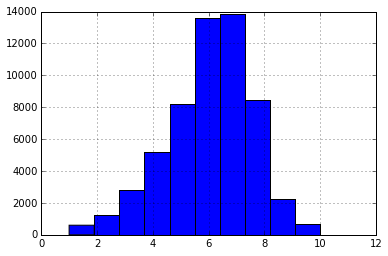

In [6]:
board_games['average_rating'].hist()
plt.show()

In [7]:
std = board_games['average_rating'].std()
std

1.5788299348332933

In [8]:
board_games['average_rating'].mean()

6.0161128493338492

In [9]:
numeric_columns = board_games.iloc[:,3:]
numeric_columns.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [10]:
regr = KMeans(n_clusters=5)
regr.fit(numeric_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [11]:
labels = regr.labels_
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [12]:
game_mean = numeric_columns.apply(np.mean, axis=1)
game_mean.head()

0    3806.296359
1    2662.195541
2    1979.243229
3    2467.201242
4    6360.675421
dtype: float64

In [13]:
game_std = numeric_columns.apply(np.std, axis=1)
game_std.head()

0     7450.209585
1     4933.084135
2     3514.218155
3     4367.915199
4    13321.625345
dtype: float64

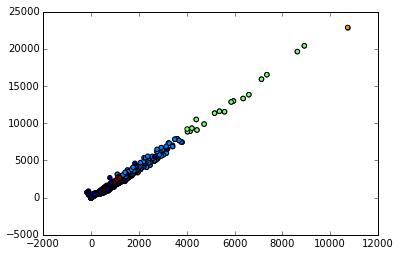

In [14]:
plt.scatter(game_mean, game_std, c=labels)
plt.show()

In [15]:
numeric_columns.corr()['average_rating']

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [16]:
cols = list(board_games.columns)
cols

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [17]:
cols.remove('name')
cols.remove('id')
cols.remove('type')
cols.remove('average_rating')
cols.remove('bayes_average_rating')
cols

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [18]:
reg = LinearRegression()
reg.fit(board_games[cols], board_games['average_rating'])

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [19]:
predictions = reg.predict(board_games[cols])
predictions

array([ 10.63462058,  10.27385741,  10.80123559, ...,   6.1218312 ,
         5.53685607,   6.08261916])

In [20]:
mse = np.mean((predictions - board_games['average_rating']) ** 2)
mse

2.093398628538742

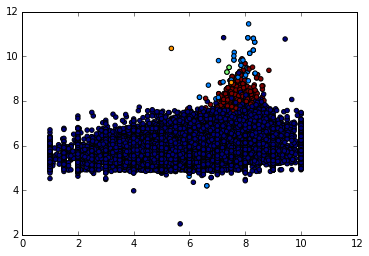

In [21]:
plt.scatter(board_games['average_rating'], predictions, c=labels)
plt.show()

In [22]:
abs(std - mse)

0.51456869370544878